# DSCI-100 Project Planning Stage

By: Stephen Wong (79445953)

## 1) Data Descriptions

In [2]:
# Load required libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# First, lets look at "player.csv"
players <- read_csv("players.csv")
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:

# Find Summary Statistics for players data set
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

### Summary of players Dataset (196 Observations)
| Variable | Variable Type | Description | Potential Issues |Minimum| Median|Mean|Maximum|
| -------- | ------- |---|---|---|---|---|---|
| experience | Categorical |Player's experience level|Unstandarized data could bias classification model| N/A| N/A|N/A|N/A|
| subscribe | True/False |Whether the player has subscribed to newsletter| Imbalance of Classes| N/A |N/A|N/A|N/A|
| hashedEmail | Identifier |Hashed emails of players| Irreleveant to answering our question|N/A|N/A|N/A|N/A|
|played_hours | Quantitative | Total hours played | Possible Outliers |0.00|0.10|5.85|223.10|
|name | Categorical | Player's name | Irrelevant to answering our question|N/A|N/A|N/A|N/A|
|gender | Categorical | Player's gender | Some gender not specified|N/A|N/A|N/A|N/A|
|Age | Quantitative| Player's Age | Possible Outliers|9.00|19.00|21.14|58.00|




In [5]:
#Second,lets look at sessions.csv
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [6]:
# Find Summary Statistics for sessions dataset
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

### Summary Staistics of sessions dataset (1535 Observations)
| Variable | Variable Type | Description | Potential Issues|Minimum|Median|Mean|Maximum|
| -------- | ------- |---|---|---|---|---|---|
| hashedEmail | Identifier |Hashed emails of players| Some players have multiple sessions opened up| N/A|N/A|N/A|N/A|
|start_time | Quantitative | Start of session |Format is harder to read |N/A|N/A|N/A|N/A|
|end_time | Quantitative| End of Session | Format is harder to read|N/A|N/A|N/A|N/A|
|original_start_time |Quantitative| Original Session Start (milliseconds)| Format is harder to read | 1.712e+12|1.719e+12|1.719e+12|1.727e+12|
|original_end_time |Quantitative| Orginal Sessions End (milliseconds) | Format is harder to read| 1.712e+12|1.719e+12|1.719e+12|1.727e+12|


## 2) Questions

**Broad Question:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific Question:** How well does the variable played_hours predict whether player's subscribe to the game-related newsletter?

 To help us determine how well played_hours predicts newsletter subscription, we will use players.csv since it has all the variables necessary. However, to be able to answer our question, we first make subscribe a factor by using mutate() function to help later on with our classification.Then we need to group the data set from those who subscribed and those who haven't subscribed to the newsletter using the group_by() function. Then, using summarize () function, we can find the average value of played_hours among the groups. From there, we can see if there is a trend between the variables played_hours and subscribe. By wrangling our data into a tidy format and having all our necessary data, we can directly assess how well played_hours predicts newsletter subscription and quantify the model’s accuracy when doing KNN Classification.

### 3)Exploratory Data Analysis and Visualization

In [7]:
#1) Load the player.csv dataset
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [8]:
#2) 
# First, we meed to make subscribe a factor for our classification
subscribe_as_factor <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "TRUE" = "Subscribed", "FALSE" = "Not Subscribed"))

# Next we need to group the data into groups, and find the mean value of each group
players_summary <- players |>
group_by(subscribe)|>
summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))
players_summary

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `subscribe = fct_recode(subscribe, `TRUE` = "Subscribed",
  `FALSE` = "Not Subscribed")`.
Caused by warning:
! Unknown levels in `f`: Subscribed, Not Subscribed”


subscribe,avg_played_hours
<lgl>,<dbl>
FALSE,0.5019231
TRUE,7.7756944


In [9]:
#3) Compute the mean value for each quantative variable in the players.csv data set
summary_stats_players <- players |>
  summarise(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),)
summary_stats_players

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


#### Table of the mean values of each quantative variable in the players.csv data set
| Variable  | Mean Value
| -------- | ------- 
| played_hours| 5.85
| age | 21.14


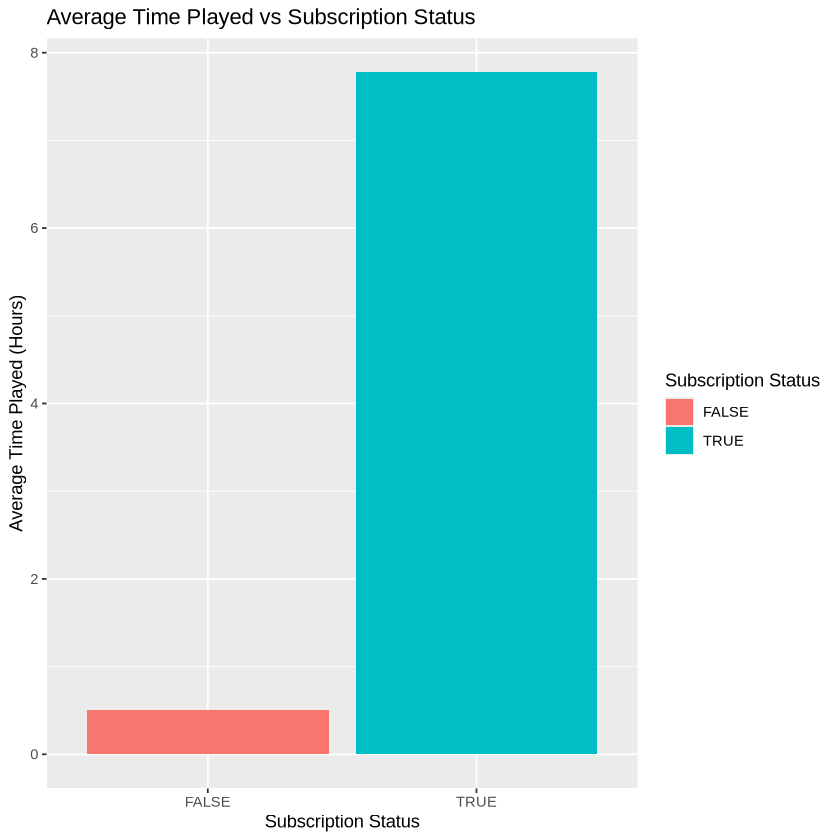

In [10]:
#4) Create a Visualization, to better analyze the trends to better answer our question.
players_bar_plot <- players_summary |>
   ggplot(aes(x = subscribe, y = avg_played_hours, fill = subscribe)) + 
   geom_bar(stat = 'identity') + 
   xlab("Subscription Status") +
   ylab("Average Time Played (Hours)") +
   labs(fill = "Subscription Status") +
   ggtitle("Average Time Played vs Subscription Status")
players_bar_plot

Looking at the plot above, we can see that player's who have subscribed to the newsletter play an average of 7.77 hours, while player's who havent subscribed to the newsletter played an average of 0.50 hours. Thefore, we can assume that the more a player's plays the game, the more likely there are to subscribe to the newsletter.

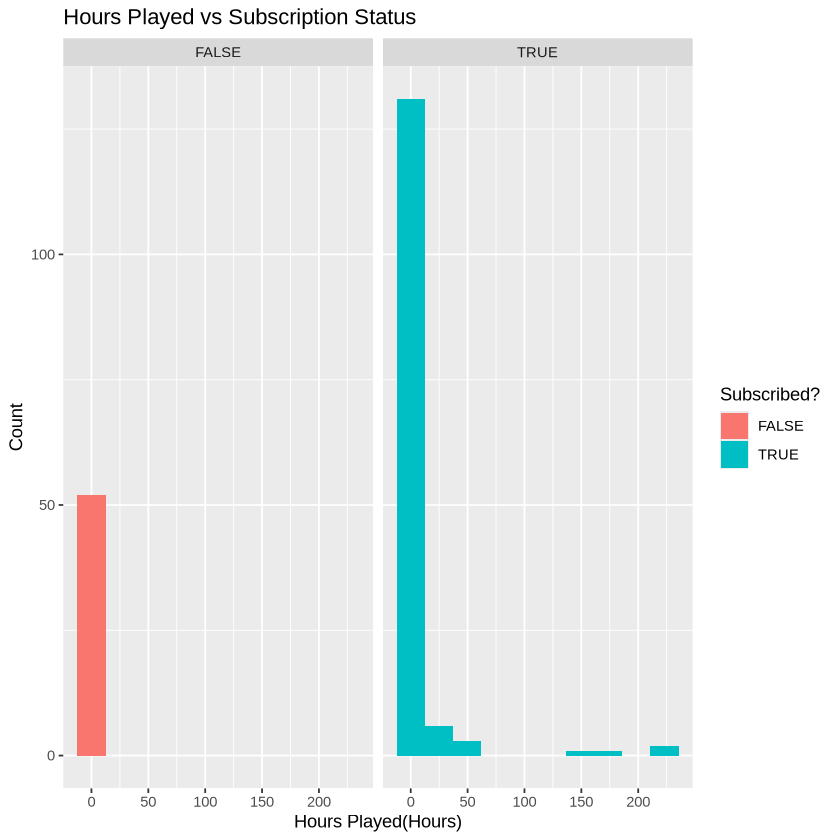

In [11]:
# Here is a second visualization
players_histogram <- players|>
ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 10) +
  facet_wrap(~subscribe) +
  labs(title = "Hours Played vs Subscription Status", x = "Hours Played(Hours)",y = "Count",fill = "Subscribed?")

players_histogram

In our previous visualization, we observed a trend indicating that playing hours results in a higher likelihood of subscribing to the newsletter. However, in the visualization above, we see that many people subscribe to the newsletter before even playing the game. This visualization disproves our original assumption that played_hours directly correlates with a player subscribing to the newsletter. But, it is still seen that players who play more hours are somewhat more likely to subscribe. This suggests that played_hours may not be the most effective predictor of a player's subscription status and using another variable like Age might be a better predictor.

### 4) Methods and Plan

To address our question, we will be using a KNN classification model to predict whether a player subscribes based on their played hours. I chose KNN classification because we are trying to predict if a player is subscribed or not, which is a categorical variable, and KNN classifies data points by finding the most similar observations using numeric predictors, like 'played_hours'. The main assumptions are that the data should be properly scaled and that distance-based similarity meaningfully represents player behaviour. However, KNN can be sensitive to outliers and the choice of k, which may affect prediction accuracy. To ensure that outliers will not skew the prediction accuracy of the classification, we will split the dataset into a training set (70%) and a testing set (30%) using the set.seed() and initial_split() functions. The model will be trained on the training data and evaluated on the testing data using accuracy as our main performance metric. We will also use cross-validation using 5 folds to test different values of k and select the one that provides the best generalization. Through this approach, we can evaluate how strongly playtime predicts subscription behaviour while ensuring our model is scaled properly to prevent disturbing our prediction accuracy.

#### 5)Link to GitHub Repository:
https://github.com/Stephen-W74/DSCI-100-Project-Planning-Stage.git